In [9]:
import pandas as pd
import numpy as np
import geopandas as gpd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import minmax_scale


In [3]:
df = gpd.read_file('../raw_data/infra_model_gdf.shp')

In [31]:
pr = gpd.read_file('/Users/Safia/code/Safiaaaaa/YouthInTheCity/raw_data/maps/pr_2021.shp')

In [32]:
pr

,PLR_ID,PLR_NAME,BZR_ID,BZR_NAME,PGR_ID,PGR_NAME,BEZ,FINHALT,STAND,geometry
0,11501341,Karlshorst Süd,115013,Karlshorst,1150,Lichtenberg Süd,11,2.294054e+06,01.01.2021,"POLYGON ((399848.954 5815619.506, 399854.727 5..."
1,03701659,Immanuelkirchstraße,037016,Prenzlauer Berg Süd,0370,Südlicher Prenzlauer Berg,03,4.115167e+05,01.12.2021,"POLYGON ((393175.012 5821135.577, 393167.174 5..."
2,07601340,Tirschenreuther Ring Ost,076013,Marienfelde Süd,0760,Marienfelde / Lichtenrade,07,4.139754e+05,01.01.2021,"POLYGON ((388394.110 5807792.070, 388379.276 5..."
3,02500831,Wismarplatz,025008,Frankfurter Allee Süd FK,0250,Friedrichshain Ost,02,2.489918e+05,01.01.2021,"POLYGON ((396010.552 5819339.570, 396021.567 5..."
4,12601134,Märkisches Zentrum,126011,MV Nord,1260,Märkisches Viertel,12,1.127871e+06,01.01.2021,"POLYGON ((387367.428 5828619.763, 387315.862 5..."
...,...,...,...,...,...,...,...,...,...,...
537,12500927,Wittenau Nord,125009,Nord 2 - Waidmannslust/Wittenau/Lübars,1250,Wittenau/Borsigwalde,12,2.494710e+06,01.01.2021,"POLYGON ((387280.650 5828614.114, 387266.882 5..."
538,03200204,Blankenfelde,032002,Blankenfelde/Niederschönhausen,0320,Nördliches Pankow,03,1.306805e+07,01.01.2021,"POLYGON ((392586.179 5829994.574, 392586.626 5..."
539,10400941,Pilgramer Straße,104009,Mahlsdorf,1040,Kaulsdorf/Mahlsdorf,10,3.691050e+06,01.01.2021,"POLYGON ((406064.851 5815581.891, 406061.455 5..."
540,08100101,Hasenheide,081001,Schillerpromenade,0810,Neukölln,08,8.663653e+05,01.01.2021,"POLYGON ((391887.140 5816592.598, 391898.686 5..."


<AxesSubplot:>

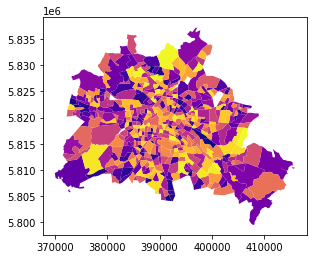

In [37]:
df.plot(cmap='plasma')

In [6]:
df = df.set_index('PLR_ID')

In [7]:
X = df.drop(columns=['child_pov', 'geometry'])
y = df['child_pov']

In [11]:
X.columns

Index(['culture', 'outdoor_fa', 'outdoor_le', 'social_hou', 'public_hou',
       'vegpm20', 'Gymnasium', 'kita', 'stations', 'extra_edu'],
      dtype='object')

In [15]:
X_scaled = pd.DataFrame(minmax_scale(X), columns=list(X.columns), index= X.index)

In [16]:
X_scaled

,culture,outdoor_fa,outdoor_le,social_hou,public_hou,vegpm20,Gymnasium,kita,stations,extra_edu
PLR_ID,,,,,,,,,,
11501341,0.055556,0.170213,0.140351,0.049929,0.465795,0.227605,0.00,0.253333,0.277778,0.1
3701659,0.333333,0.098784,0.175439,0.014968,0.236446,0.182908,0.25,0.613333,0.361111,0.6
7601340,0.027778,0.003040,0.105263,0.487543,0.501912,0.163179,0.00,0.213333,0.000000,0.0
2500831,0.194444,0.167933,0.245614,0.028363,0.152738,0.167798,0.50,0.533333,0.361111,0.2
12601134,0.000000,0.064590,0.421053,0.059793,0.796695,0.259868,0.25,0.306667,0.055556,0.1
...,...,...,...,...,...,...,...,...,...,...
12500927,0.000000,0.046353,0.157895,0.059793,0.796695,0.368450,0.50,0.346667,0.111111,0.0
3200204,0.000000,0.056991,0.140351,0.123020,0.059325,0.222269,0.00,0.080000,0.055556,0.0
10400941,0.027778,0.034195,0.070175,0.021083,0.007849,0.155450,0.00,0.146667,0.333333,0.0


In [8]:
linear = LinearRegression()

In [18]:
l = linear.fit(X,y)

In [20]:
(y - l.predict(X)).mean()

8.749220253762427e-16

In [22]:
l.score(X,y)

0.36006915277017304

In [30]:
pd.DataFrame(zip(X.columns, list(l.coef_)))

,0,1
0,culture,0.045760
1,outdoor_fa,0.010396
2,outdoor_le,-0.115416
3,social_hou,1.003532
4,public_hou,0.538592
5,vegpm20,-0.877128
6,Gymnasium,-1.161781
7,kita,0.354930
8,stations,-0.713036
9,extra_edu,-1.823508


In [24]:
list(l.coef_)

[0.04576033586287732,
 0.010395614799151267,
 -0.11541569655937865,
 1.0035319600707628,
 0.5385921657852432,
 -0.8771278093077256,
 -1.161781400527216,
 0.3549303199252314,
 -0.713035766208774,
 -1.8235076516961017]